<a href="https://colab.research.google.com/github/fatisa2000/hw4/blob/main/Clustering_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Section 1. Import Libraries



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import warnings

In [2]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Section 2. Load Dataset

In [3]:
# TO DO: Read CSV file
data= pd.read_csv('AirlineSatisfaction.csv')
# TO DO: Display first few rows of the dataframe
data.head(1)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied


## Section 3. EDA

(25976, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 n

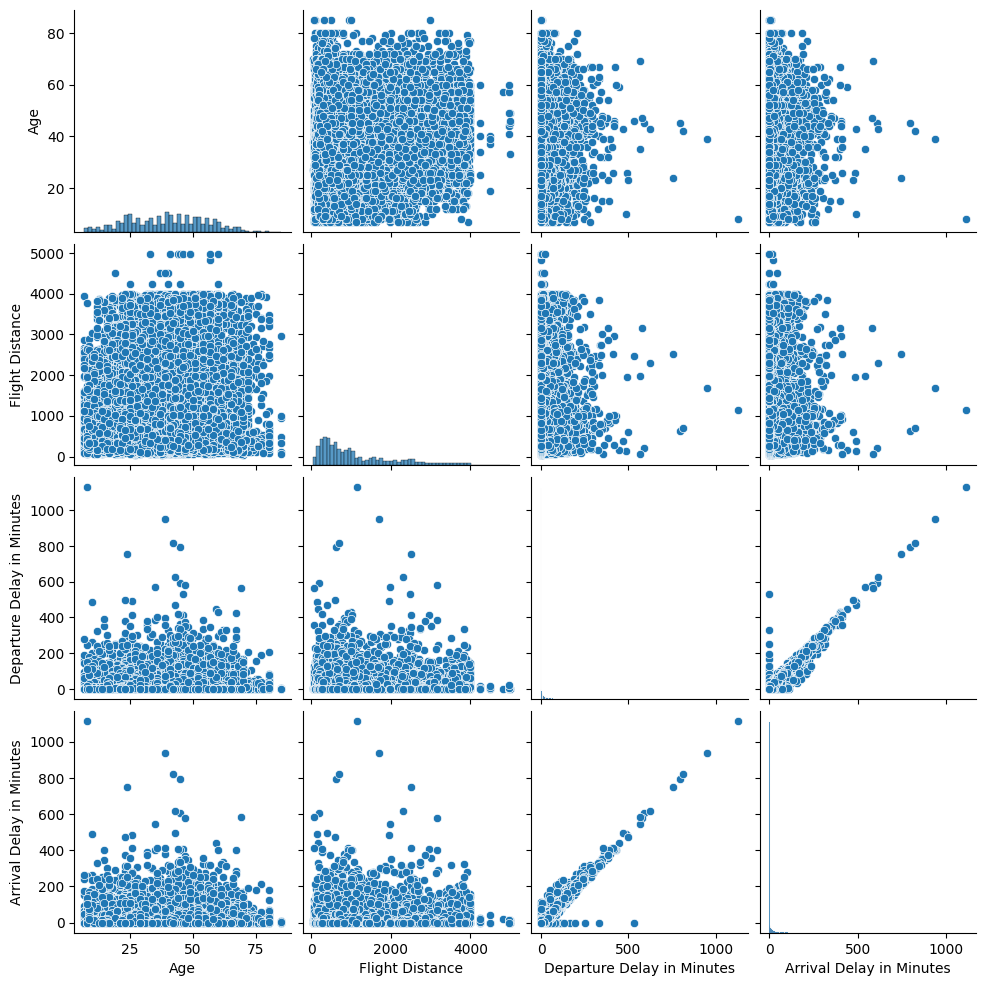

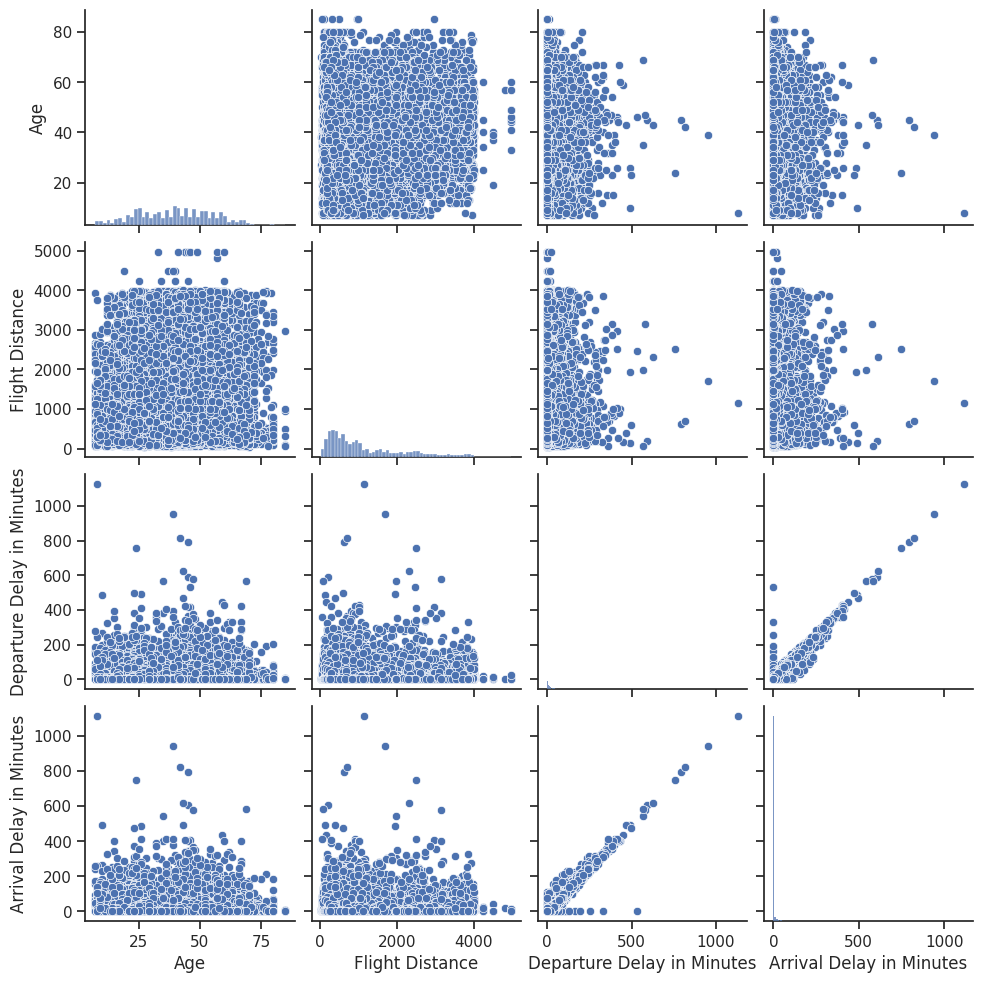

In [4]:
# TODO: Print the shape of the data
print(data.shape)
# TODO: Print the information about the dataframe
print(data.info())
# TODO Display the summary statistics of the dataframe
print(data.describe())
# Removing unnecesary columns

df=data.drop(['Unnamed: 0','id','Gender', 'Customer Type','Type of Travel', 'Class', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness','satisfaction'],axis=1)

# TODO: Replace any NaN values in the dataframe with 0
tf=df.fillna(0)
print(tf)
# TODO: Print the number of NaN values in each column of the dataframe
num=tf.isna().sum()
print(num)
# TO DO: Create a pairplot using Seaborn library
sns.pairplot(tf)
sns.set(style="ticks")
sns.pairplot(tf)


## Section 5. Model Building | Training

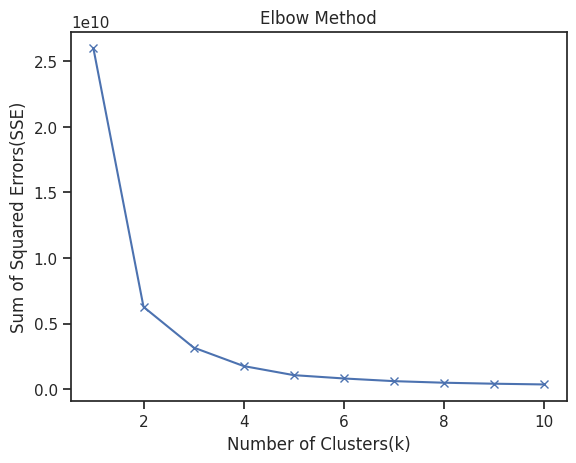

[25985469786.634224, 6277010014.004478, 3174277064.614797, 1762087908.5152297, 1070425502.4545832, 817342084.9809341, 613089666.0089654, 492480337.068764, 417511595.77433676, 361953456.42809445, 309058121.98738456, 270613918.99458253, 249175281.25373656, 224935638.7285031, 209440239.60452682, 195648073.2262568, 184805786.01233426, 170359599.6670347, 159646792.46656913, 151396869.29217637]


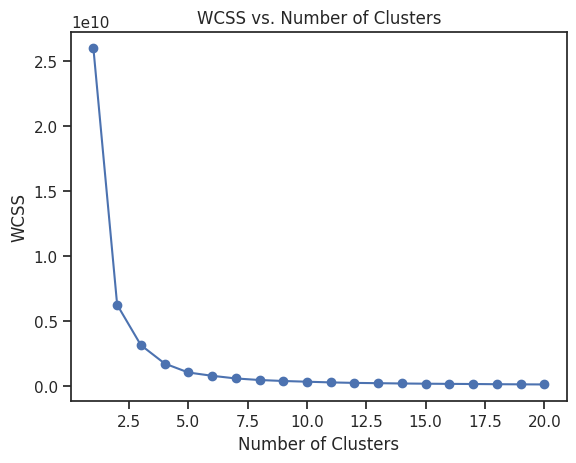

In [5]:
# TO DO: Implement the elbow method to determine the optimal number of clusters
k_values = range(1,11)
e = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(tf)
    e.append(kmeans.inertia_)
plt.plot(k_values,e,'bx-')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Squared Errors(SSE)')
plt.title('Elbow Method')
plt.show()
# TO DO: Create a KMeans model for each number of clusters from 1 to 20
k_values = range(1, 21)  # Testing cluster numbers from 1 to 20

kmeans_models = {}
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tf)
    kmeans_models[k] = kmeans
# TO DO: Fit the KMeans model to the data and append the within-cluster sum of squares (WCSS) to a list
wcss_list = []
cluster_numbers=[]
for k in k_values:
  kmeans_models[k].fit(tf)
  wcss = kmeans_models[k].inertia_
  wcss_list.append(wcss)
  cluster_numbers.append(k)
print(wcss_list)
# TO DO: Plot the WCSS for each number of clusters
plt.plot(cluster_numbers, wcss_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('WCSS vs. Number of Clusters')
plt.show()

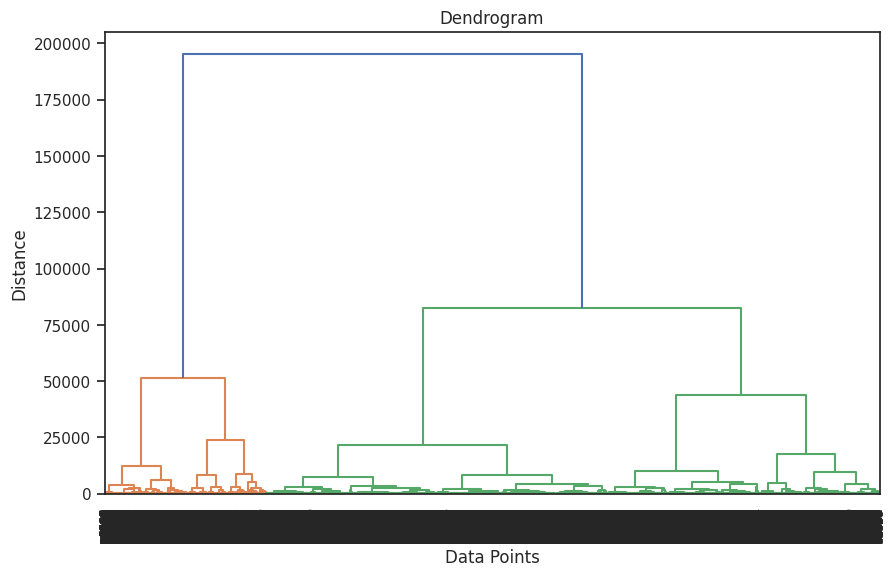

In [6]:
# TO DO: Create a dendrogram using hierarchical clustering
# TO DO: Use the ward method to calculate linkage
Z = linkage(tf, method='ward')
# TO DO: Plot the dendrogram
plt.figure(figsize=(10, 6))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

## Section 6. K Means Clustering

In [7]:
# TO DO: Create a KMeans model with the best number of clusters
elbow_index = None
for i in range(1, len(wcss_list) - 1):
    prev_slope = wcss_list[i] - wcss_list[i-1]
    next_slope = wcss_list[i+1] - wcss_list[i]
    if prev_slope > next_slope:
        elbow_index = i
        break
best_num = cluster_numbers[elbow_index]
kmeans_best = KMeans(n_clusters=best_num)
# TO DO: Fit the KMeans model to the data and assign the resulting
kmeans_best.fit(tf)
labels = kmeans_best.labels_
# cluster labels to a new column in the dataframe
tf['cluster_labels']=labels


## Section 7. Agglomerative Clustering

In [8]:
# TO DO: Create an Agglomerative Clustering model with the best number of clusters
# using the Euclidean distance metric and ward linkage
agg_model = AgglomerativeClustering(n_clusters=best_num, affinity='euclidean', linkage='ward')
# TO DO: Fit the Agglomerative Clustering model to the data and assign
labels1 = agg_model.fit_predict(tf)
# the resulting cluster labels to a new column in the dataframe
tf['cluster_labels1']=labels1

## Section 8. Clusters Visualization

In [9]:
# TO DO: Remove outliers from the dataframe to improve visualization
z_scores = np.abs((tf - tf.mean()) / tf.std())
threshold = 3
tf_noout = tf[(z_scores < threshold).all(axis=1)]
print(tf)

       Age  Flight Distance  Departure Delay in Minutes  \
0       52              160                          50   
1       36             2863                           0   
2       20              192                           0   
3       44             3377                           0   
4       49             1182                           0   
...    ...              ...                         ...   
25971   34              526                           0   
25972   23              646                           0   
25973   17              828                           0   
25974   14             1127                           0   
25975   42              264                           0   

       Arrival Delay in Minutes  cluster_labels  cluster_labels1  
0                          44.0               3                5  
1                           0.0               8                0  
2                           0.0               3                5  
3                      

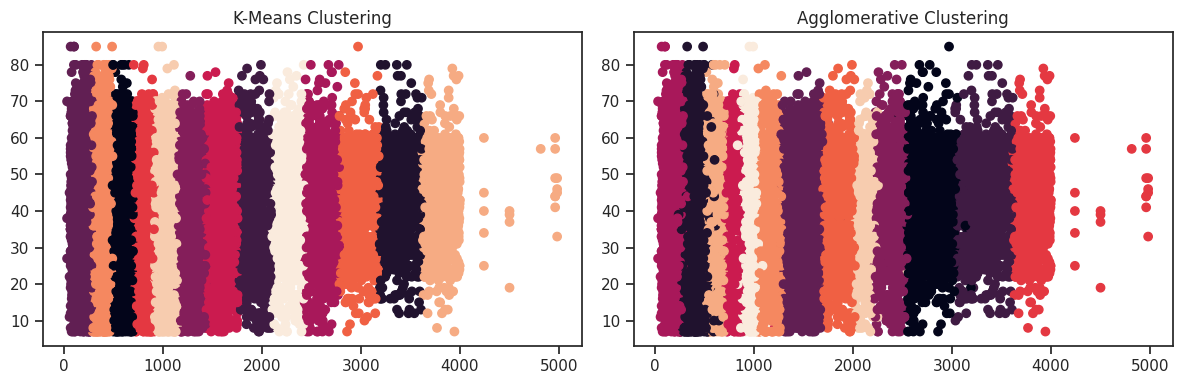

In [19]:
# TO DO: Create a scatter plot with subplots for each clustering method
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# TO DO: Plot the data points for each cluster in a different color and label the clusters accordingly
axes[0].scatter(tf['Flight Distance'], tf['Age'], c=labels)
axes[0].set_title('K-Means Clustering')

axes[1].scatter(tf['Flight Distance'], tf['Age'], c=labels1)
axes[1].set_title('Agglomerative Clustering')
plt.tight_layout()
plt.show()
